Implementación de la Transformada de Fourier Fraccionaria utilizando la FFT

TRANSFORMADA DISCRETA DE FOURIER

La implementación óptica de la transformada de Fourier está dada por el siguiente esquema:
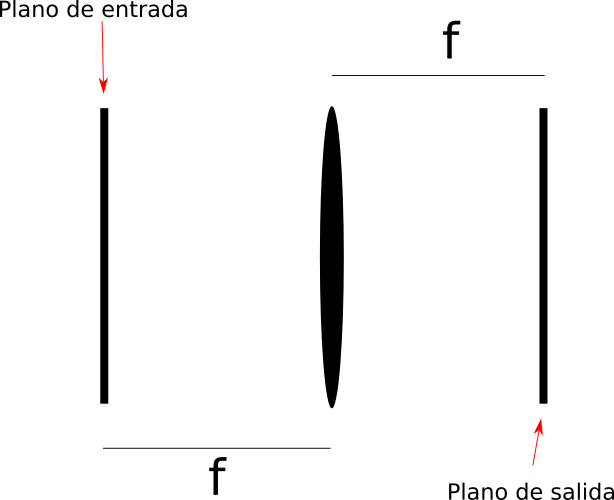
De esta forma se obtiene sobre el plano de salida una transformada de Fourier escalada de la transparencia de entrada $u(x)$ así:
\begin{equation}
\widetilde{u}(\widetilde{x})= \frac{\exp{(jkf)}}{j\lambda f}\int_{-\infty}^{\infty}  u(x)\exp{\left(-j\frac{2\pi}{\lambda f}x\widetilde{x}\right)}dx
\end{equation}
Recordar que $k=\frac{2\pi}{\lambda}$, el factor $\lambda f$ es el factor de escala entre la transformada de Fourier y la distribución de luz obtenida(difracción de campo lejano). 

Para realizar la implementación numérica de dicha transformada se deben discretizar los planos de entrada y salida respectivamente:
\begin{equation}
x=m\Delta x
\end{equation}

\begin{equation}
\widetilde{x}=\widetilde{m}\Delta \widetilde{x}
\end{equation}
Con $m$ y $\widetilde{m}$ enteros. Con un apropiado intervalo de muestreo, se evita la perdida de información y se minimiza el número de operaciones a realizar (teoría de muestreo).

Despues de realizar el muestreo, se obtiene una distribución así (DFT):
\begin{equation}
\widetilde{u}_{\widetilde{x}} = \sum_{m=-N/2}^{N/2-1}u_{m}\exp{\left(-j\frac{2\pi}{N}m\widetilde{m}\right)}
\end{equation}
$N$ es la dimensión de los vectores del plano de entrada y el plano de salida. Esto es gracias a asumir que:
\begin{equation}
\lambda f = N \Delta x \Delta \widetilde{x}
\end{equation}
para poder realizar el cálculo por medio de la transformada discreta de Fourier.\\
Naturalmente debe cumplirse que para los planos de entrada y salida respectivamente, la longitud real sea:
\begin{equation}
L_{x}= N\Delta x, ~L_{\widetilde{x}}= N\Delta \widetilde{x}
\end{equation}

La difracción de Fresnel (campo medio a campo lejano) se puede puede hallar en términos de la $DFT$ y consecuentemente con la $FFT$, esto acelera considerablemente los cálculos. Sin embargo, debido al factor de escala en la transformada Discreta, no se puede establecer una única función para el cálculo de la difracción del plano contiguo al objeto hasta cualquier distancia (infinita en general); así pues es necesario separar las regiones para el cálculo (campo medio-lejano y campo cercano-medio) y cuales funciones de propagación son óptimas para cada región.

${Caso~A.~Campo~medio~hasta~el~campo~de~Fourier}$
Por cualquiera de los métodos para solucionar el problema de difracción-propagación, se obtiene que la distribución del campo difractado a una distancia $z$ de una transparencia $u(x)$ por la incidencia de una onda plana :
\begin{equation}
u'(x') = \frac{\exp{(jkz)}}{j\lambda z}\left[u(x)*\exp{\left( j\frac{\pi}{\lambda z}x'^{2}\right)}\right]
\end{equation}
El símbolo $*$ denota la operación convolución. Haciendo uso de la propiedad de convolución espacial de la FT (transformada de fourier) se obtiene que la expresión anterior se puede expresar de forma integral así:
\begin{equation}
\begin{split}
u'(x')= \frac{\exp{(jkz)}}{j\lambda z}\exp{\left(j\frac{\pi}{\lambda z}x'^{2}\right)}\\
\times\int_{-\infty}^{\infty}  \left[u(x)\exp{\left(j\frac{\pi}{\lambda z}x^{2}\right)}\right]\exp{\left(-j\frac{2\pi}{\lambda z}xx'\right)}dx
\end{split}
\end{equation}
Se aprecia entonces que esta expresión está dada por una transformada de Fourier escalada de la transparencia en el plano de entrada multiplicada por un factor de fase, posterior a esto,  se multiplica dicho resultado por un factor de fase cuadrático.

Para poder llevar acabo el cálculo de la difracción de Fresnel usando la $FFT$ se necesita que se cumpla:
\begin{equation}
N\Delta x \Delta x' = \lambda z
\end{equation}
Y ya que $L_{x}= N\Delta x$ y $L_{x'}= N\Delta x'$  , tambien se cumple que:
\begin{equation}
L_{x}L_{x'}= \lambda z N
\end{equation}
Realizando las respectivas sustituciones en la expresión contínua de la difracción de Fresnel se obtiene:
\begin{equation}
\begin{split}
u'_{m'}= \frac{\exp{(jkz)}}{j\lambda z}exp{\left(j\frac{\pi \lambda z}{L_{x}^{2}}m'^{2}\right)}\\
\times \sum_{m=-N/2}^{N/2-1}\left[u_{m}exp{\left(\frac{j\pi L_{x}^{2}m^{2}}{\lambda z N^{2}}\right)}\right]\exp{\left(-j\frac{2\pi}{N}mm'\right)}
\end{split}
\end{equation}


Con esto se garantiza que la difracción de Fresnel sea calculada por medio de la $FFT$. Haciendo un análisis a la restricción $L_{x}L_{x'}= \lambda z N$, se puede ver que para distancias grandes ($z$), se debe tener entonces un mayor valor de $L_{x'}$ para que se satisfaga la condición.

Desafortunadamente este método de estar ajustando el valor de $L_{x'}$ para cualquier $z$ no funciona en cualquier región, debido a que la función de cuadrática acompañando la distribución de entrada a valores pequeños de $z$ varía extremadamente rápido (ver figura acontinuación), por lo que no se puede realizar un muestreo idóneo.

Delta x = 0.0050000000


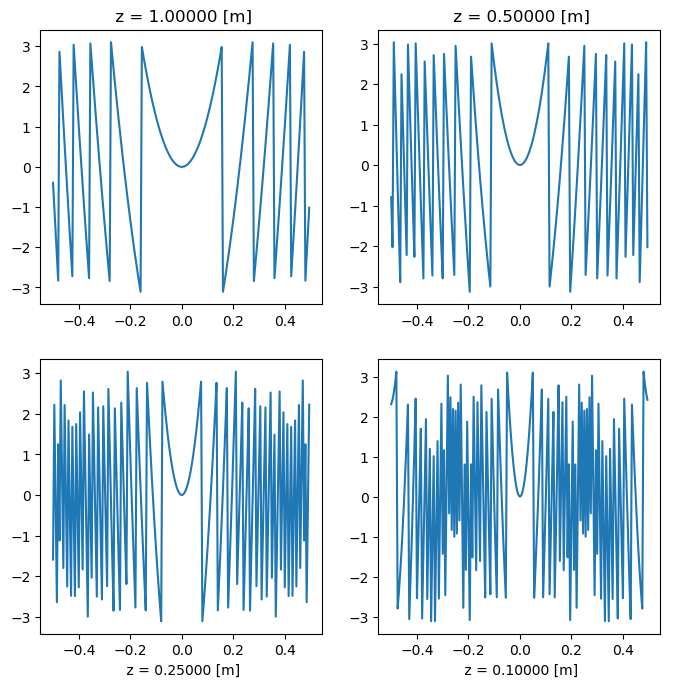

In [10]:
import numpy as np
import matplotlib.pyplot as plt
Lx = 1 # dimensión del plano entrada
l_onda = 633e-9 #longitud de onda
N = 200 # número de muestras
Delta_x = Lx/(N)
m = np.arange(-Lx/2, (Lx/2), Delta_x) # vector en el plano de entrada
print('Delta x = %.10f'% Delta_x)
plt.figure(num=1, figsize = (8,8), dpi= 100)
plt.subplot(2,2,1)
z = 1 # distancia de calculo de la propagación
f_cuadratica = np.exp(1j*np.pi*(Lx**2)*(m**2)/(l_onda*z*(N**2))) # función chirp
plt.plot(m,np.angle(f_cuadratica))
plt.title(' z = %.5f [m]'%z)
plt.subplot(2,2,2)
z = 0.5 # distancia de calculo de la propagación
f_cuadratica = np.exp(1j*np.pi*(Lx**2)*(m**2)/(l_onda*z*(N**2))) # función chirp
plt.plot(m,np.angle(f_cuadratica))
plt.title(' z = %.5f [m]'%z)
plt.subplot(2,2,3)
z = 0.25 # distancia de calculo de la propagación
f_cuadratica = np.exp(1j*np.pi*(Lx**2)*(m**2)/(l_onda*z*(N**2))) # función chirp
plt.plot(m,np.angle(f_cuadratica))
plt.xlabel(' z = %.5f [m]'%z)
plt.subplot(2,2,4)
z = 0.1 # distancia de calculo de la propagación
f_cuadratica = np.exp(1j*np.pi*(Lx**2)*(m**2)/(l_onda*z*(N**2))) # función chirp
plt.plot(m,np.angle(f_cuadratica))
plt.xlabel(' z = %.5f [m]'%z)
plt.show()

Para determinar el rango de un muestréo idoneo, primero notar que el factor de fase:
\begin{equation}
exp{\left(\frac{j\pi L_{x}^{2}m^{2}}{\lambda z N^{2}}\right)}
\end{equation}
varía linealmente con la distancia  desde el centro del vector $m$ como se vé en la figura acontinuación:
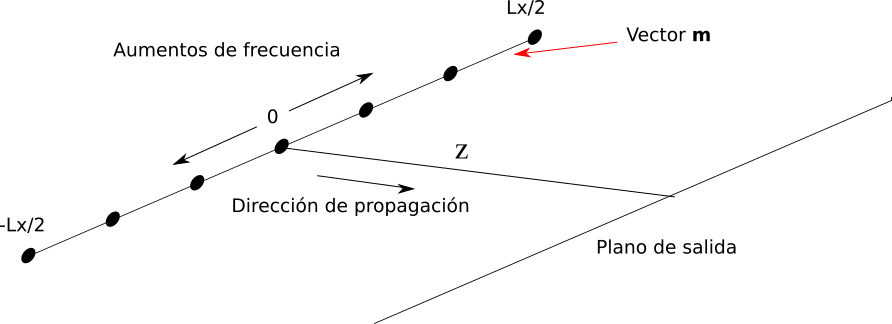



Si se asume que en la frontera del dominio de la función de fase cuadrática el periodo de la función es menor al periodo de muestreo, se obtiene el siguiente criterio:
\begin{equation}
z\geq z_{1}\equiv \frac{L_{x}^{2}}{\lambda N}
\end{equation}

Asumir esta condición se puede soportar por medio del uso de imágenes con una $envolvente$ de ceros en sus extremos, por lo que las frecuencias altas submuestreadas de la función de fase cuadrática no afectarán la transparencia en el plano de entrada. Aparte de esto, agregar estos ceros en las fronteras de la imagen puede suponer una mejora en el muestreo de la zona interior de interes. Otra consecuencia interesante de rellenar con ceros los extremos, es que al utilizar el algoritmo FFT al calcular la difracción, si el espectro obtenido se sale de los límites del contorno de la imagen, estos aparecen del lado inverso y se superponen con la información de dicho lado, esto genera pérdida de información y errores.

NOTA:Para los parámetros del modulador disponible $L_{x}=N\delta x= 1024\times19.6\mu m=20.07mm$ y un laser de He-Ne con $\lambda = 639nm$, por lo tanto la distancia mínima $z$ será:
\begin{equation}
z = \frac{(20.07mm)^{2}}{1024 \times 639nm}\approx 0.62m
\end{equation}

$Caso ~B.Campo ~cercano ~ al  ~objeto ~ hasta ~ el ~ campo ~ medio$

En este caso, el cálculo del campo propagado no se puede realizar por medio del uso de la convolución antes descrita, debido a los impedimentos de las altas frecuencias de la función de fase cuadrática para $z\leq z_{1}$. Debido a este impedimento, se hace mas conveniente propagar la transformada de Fourier de la señal, que la señal misma (dicen los autores).

Entonces, de la expresión de la convolución espacial, se transforma a una multiplicación en el dominio frecuencial (por propiedad de la transformada) así:
\begin{equation}
\widetilde{U}'(\nu)= \frac{\exp{(jkz)}}{j\lambda z}\widetilde{u}(\nu)\exp{(-j\pi\lambda z\nu^{2})}
\end{equation}
Donde $\widetilde{u}(\nu)$  y $\exp{(-j\pi\lambda z\nu^{2})}$  corresponden a las transformadas de Fourier de las funciones $u(x)$ y $\exp{\left( j\frac{\pi}{\lambda z}x'^{2}\right)}$ respectivamente.

Aquí recordar que la relación entre la frecuencia espacial $\nu$ y las coordenadas espaciales en el plano de Fourier ($\widetilde{x}$) es $\widetilde{x}=\lambda z \nu$. 

Se discretiza la variable frecuencial $\nu$ en la exponencial en el plano de Fourier $\nu = \widetilde{m}\Delta \widetilde{\nu}$, y utilizando la relación de las coordenadas espaciales y frecuenciales se tiene que:
\begin{equation}
\exp{(-j\pi\lambda z\nu^{2})}=\exp{(-j\pi\lambda z(\widetilde{m}\Delta \widetilde{\nu})^{2})} = \exp{\left(-j\pi\frac{ \lambda z}{L_{x}^{2}}\widetilde{m}^{2}\right)} 
\end{equation}
Usando el hecho de que $\Delta \nu = \frac{1}{L_{x}}$ (frecuencia espacial)

Con este desarrollo, se puede observar en la ecuación anterior, que para valores de $z$ pequeños, la frecuencia de la función de fase cuadrática se hace pequeña, todo lo contrario al caso anterior. Entonces se concluye que esta función permite calcular algún patrón de difracción a distancias relativamente cortas (donde la aproximación de Fresnel aún siga siendo valida). El método consiste entonces en calcular la transformada de Fourier ($FT$) de la transparencia de entrada $u(x)$, multiplicarla por el factor de fase anterior, y por último realizar una transformada inversa($IFT$) de Fourier del resultado obteniendo así el campo propagado hasta $z\leq z_{1}$. La mayor diferencia entre este método y el anterior es el doble uso de una transformada de Fourier, una inversa y otra directa. 